# Presentation: MLQC 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import utils
import os

## Data Sources
**====================================================================================================================**
We will be working with tidal station gauge data from **NOAA's National Ocean Service CO-OPS** office, i.e. the Tides & Currents people. It contains information on the mean water level, standard deviations, the tidal predictions, and secondary sensor measurements recorded every **6 minutes**. Additionally, the data has been initially Quality-Controlled (QC'ed) following **QARTOD**. The data comes from the following stations along the Atlantic Coast of the US:
1. Portland, ME
2. Boston, MA
3. Atlantic City, NJ
4. Cape May, NJ
5. Lewes, DE





In [2]:
lat = [43.6567, 42.3539, 39.3550,38.9678,38.7828]
lon = [-70.2467,-71.0503,-74.4183,-74.9597,-75.1192]
names = ['Portland, ME','Boston, MA','Atlantic City, NJ','Cape May, NJ','Lewes, DE']

m = folium.Map(location=[np.mean(lat),np.mean(lon)],tiles='Stamen Terrain',zoom_start=6)
for x,y,n in zip(lat,lon,names):
    folium.Marker(location=[x, y], popup=n).add_to(m)
m

## Data Exploration
**====================================================================================================================**

First, we need to import the data, which is stored on data buckets on Google cloud:

        gs://ohw_example/mlqcfortimeseries/8418150_portland_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8443970_boston_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8534720_ac_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8536110_cm_raw_ver_merged_wl.csv
        gs://ohw_example/mlqcfortimeseries/8557380_lewes_raw_ver_merged_wl.csv
        

In [3]:
# Read in the data
dataIn = utils.readInWL('gs://ohw_example/mlqcfortimeseries/8536110_cm_raw_ver_merged_wl.csv')

/home/andrew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (4,5,8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


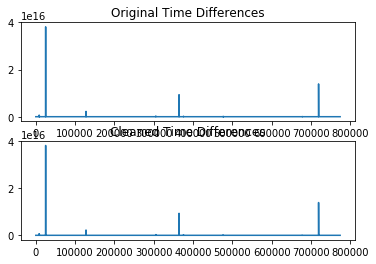

In [4]:
# Clean the data
data_cleaned = utils.initial_data_prep(dataIn)
data_cleaned = utils.remove_extra_datapoints(data_cleaned)

So, above is the an example of loaded and cleaned dataset. To avoid repeating this process, we did this for all of the available datasets and saved them to pickle files. 

In [ ]:
cleaned = pd.read_pickle("8536110_cm_raw_ver_merged_wl_Cleaned")